In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

### Data Overview

In [150]:
df = pd.read_csv("BankChurn.csv")
df.shape

(10127, 23)

In [151]:
# removes unwanted fields (clientnumber and two Naive Bayes Classifier fields) 
df = df.iloc[:, 1:-2]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [153]:
# unique values
print(df.nunique())

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


In [154]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Exploratory Analysis

### Categorical Features

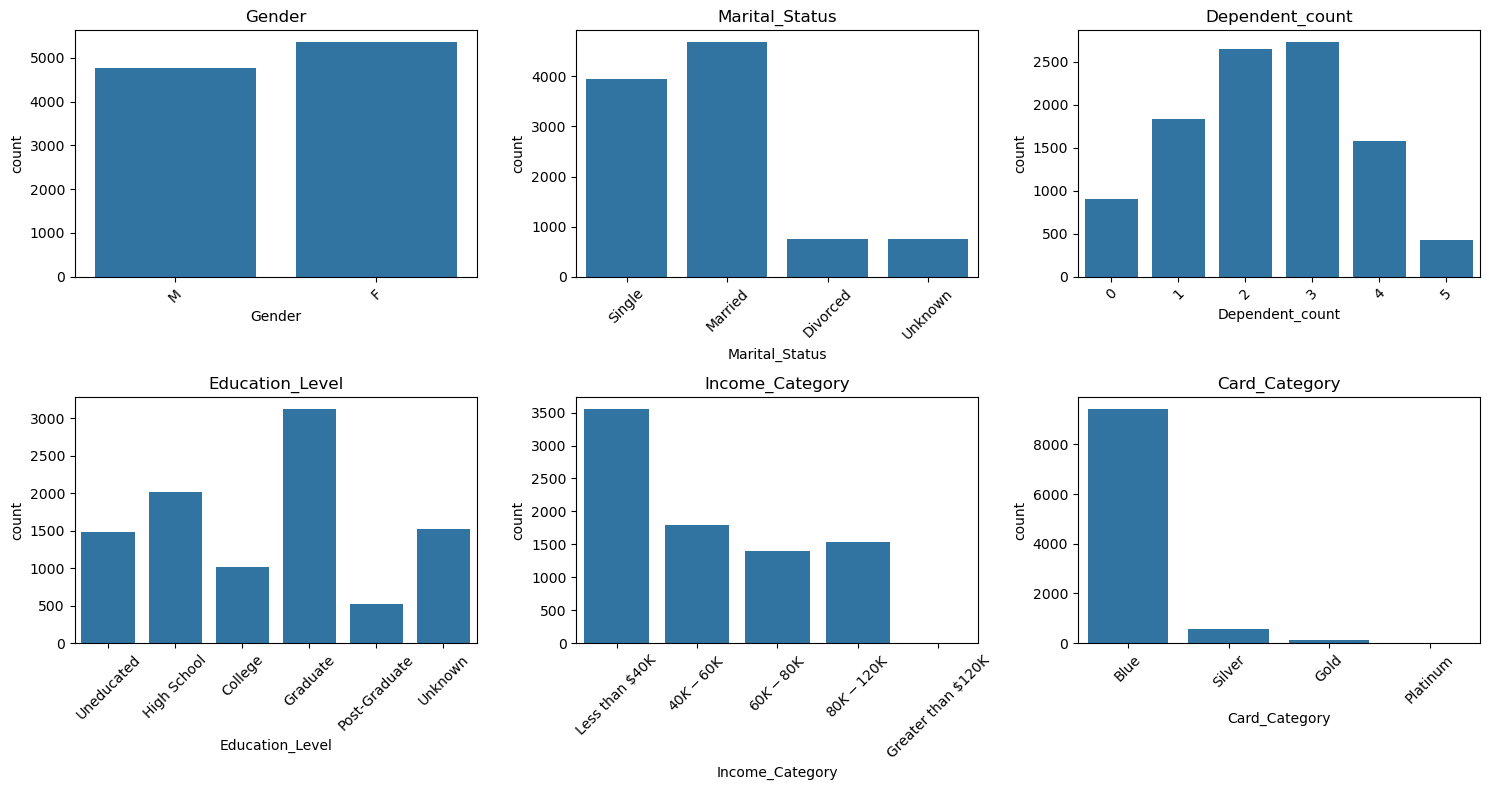

In [155]:
categorical_cols = ['Gender', 'Marital_Status', 'Dependent_count', 'Education_Level', 'Income_Category', 'Card_Category']

field_orders = {
    'Gender': None,
    'Dependent_count': [0, 1, 2, 3, 4, 5],
    'Education_Level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Unknown'],
    'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Greater than $120K'],
    'Marital_Status': ['Single', 'Married', 'Divorced', 'Unknown'],
    'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, order=field_orders[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


Overwhelming amount of customers
    - blue card olders
    - make less than 40k

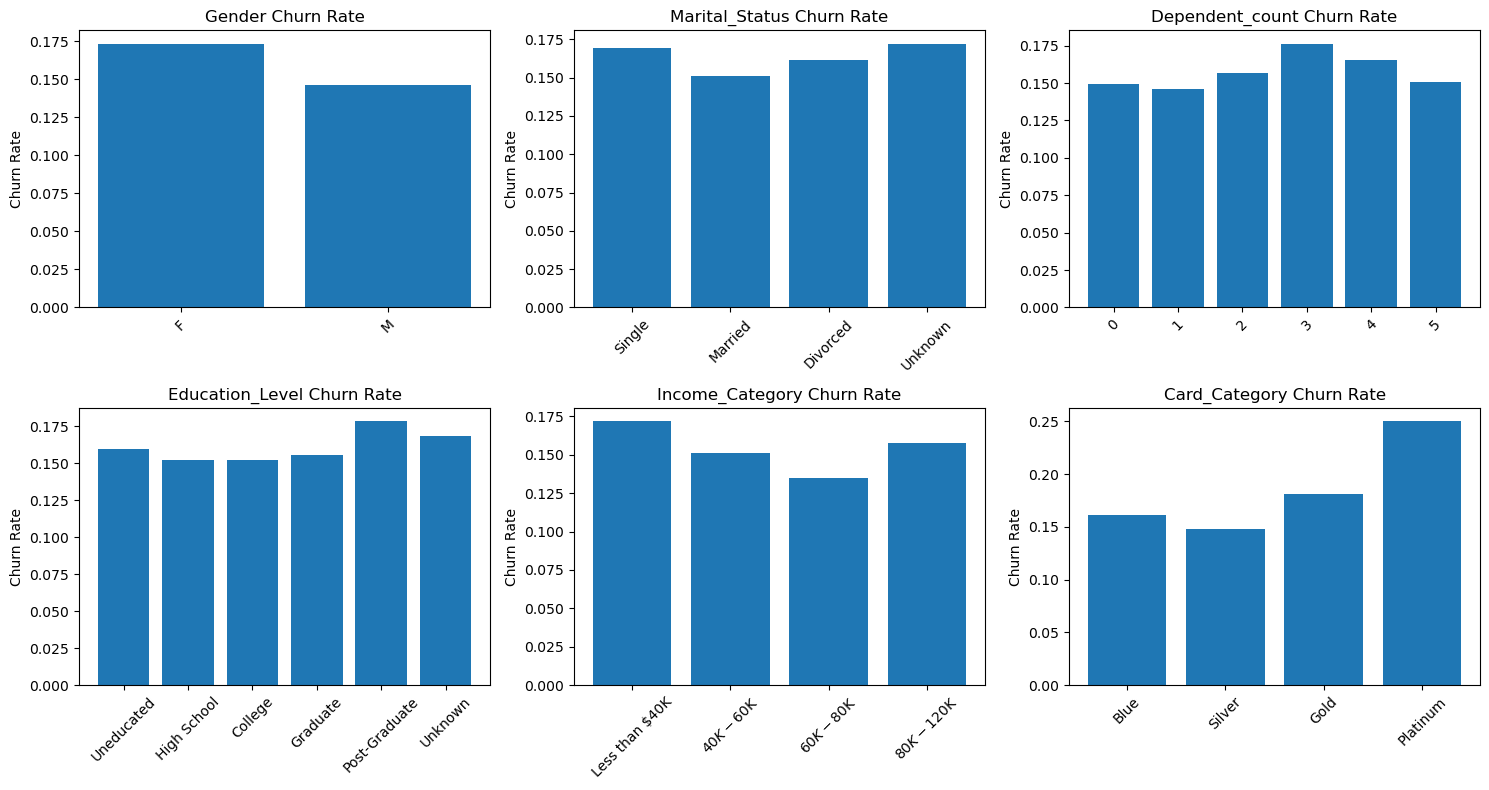

In [156]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    # Compute churn rate per category
    churn_rate = df.groupby(col)['Attrition_Flag'].apply(lambda x: (x=='Attrited Customer').mean())
    
    # Reorder if field_orders is defined
    if field_orders[col]:
        churn_rate = churn_rate.reindex(field_orders[col])
    
    # Plot on the corresponding axis
    axes[i].bar(churn_rate.index.astype(str), churn_rate.values)
    axes[i].set_title(f'{col} Churn Rate')
    axes[i].set_ylabel('Churn Rate')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



will compute churn rate per category in a field instea dof per category of attrited customers since previous charts showed the values are not balnced so eaier to higher % of churned are blue card holders but thats just because there are so many blue card holders

this chart lets us see that actually ahigher % of platinum members churn compared to other categories even thought it has the lowest overall customer count

card category
    - platinum nealry 10% higher than otehr categories



### Numerical Features

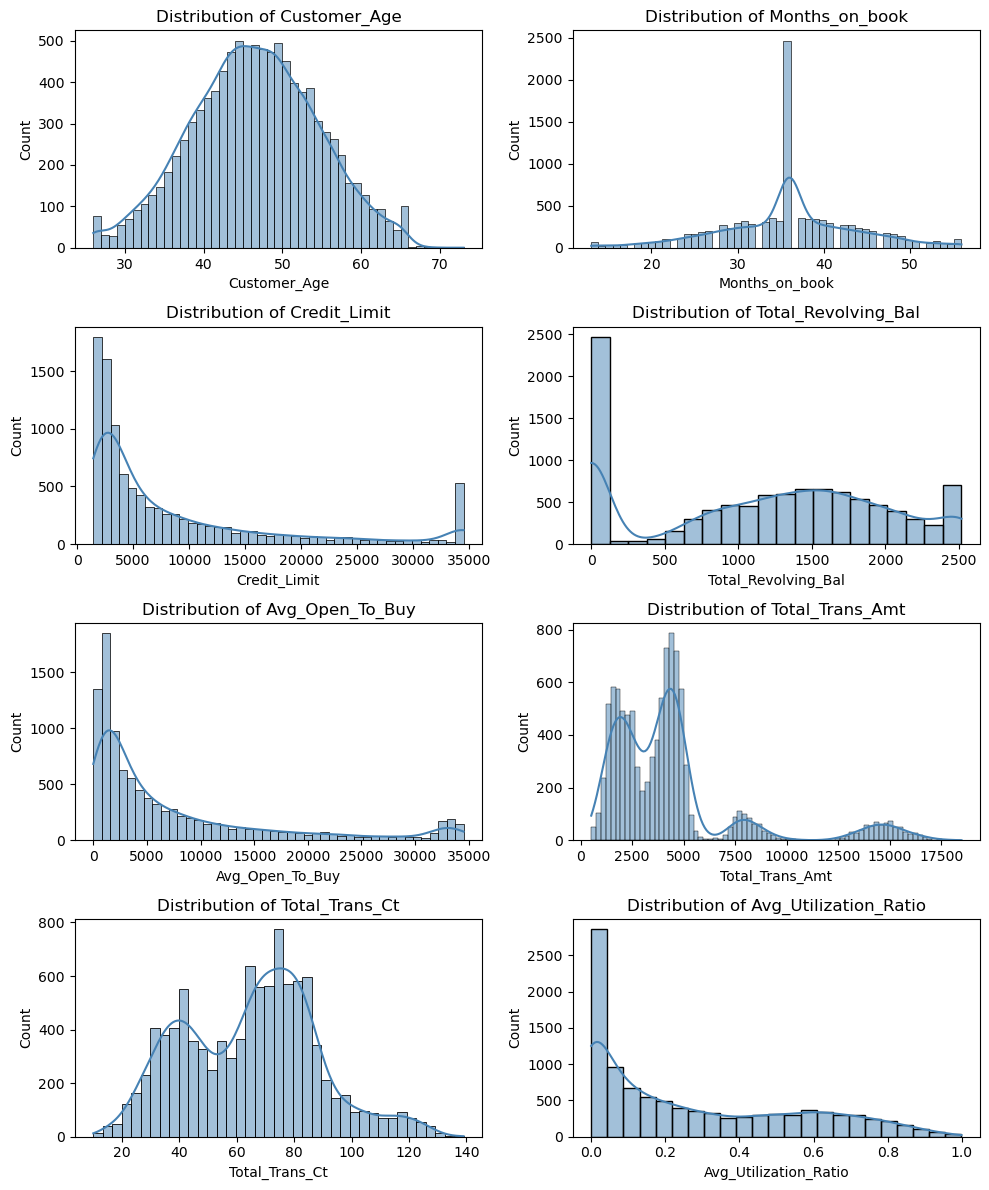

In [157]:
# number visualizations
# Numerical columns to visualize
numerical_cols = [
    'Customer_Age', 'Months_on_book', 'Credit_Limit', 
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
    'Total_Trans_Amt', 'Total_Trans_Ct', 
    'Avg_Utilization_Ratio'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Histogram + KDE for distribution
    sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    
plt.tight_layout()
plt.show()



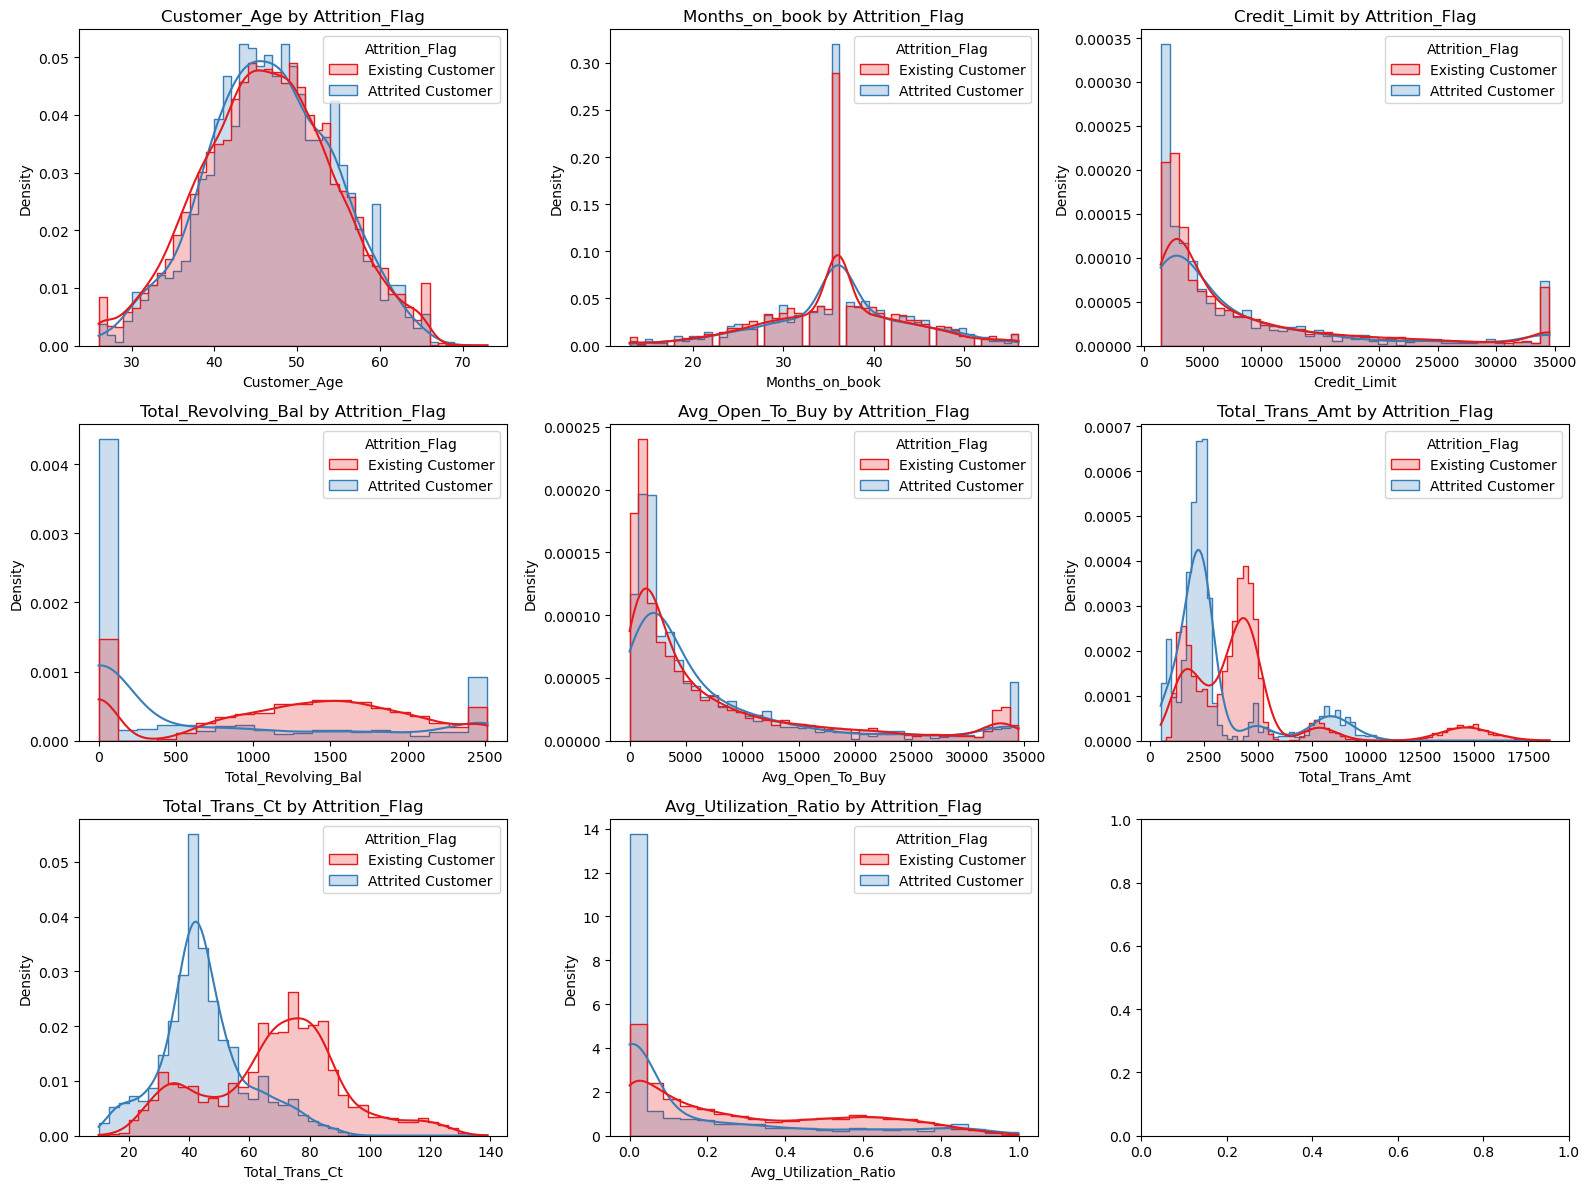

In [158]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue="Attrition_Flag", kde=True, ax=axes[i], 
                 palette="Set1", element="step", stat="density", common_norm=False)
    axes[i].set_title(f"{col} by Attrition_Flag")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()


note y axis is density not cout when comparing
- both groups similar distributions. age doesnt look like a strong differentiator
- months on books looks nearly identical with identical spike at 36 months
- lower credit customers more prone to attrition
- total revolving balance generally lower in attrituted customers although higher at the highest revolving balance measure (pile up near zero balance)
    - red more evenly spread
    - cusotmers who revolve balance are less likely to attrite
- avg open to buy: very similar to creit limit (possibly combine fields)
- total transaction count: most clear split
    - high attrition at low spend while higher existing at higher spend. around the 3000 cutoff
- total transaction count - also very high seperation - attriited usually with les than 60 total transactions
    - existing typically higher than 60

are these for a certain time period for all customers
    - Ex. not just customers in the past year but customers who have been at the bank for a year exactly

why do some charts have spike for both populations at the highest value? does range only go up to certain value

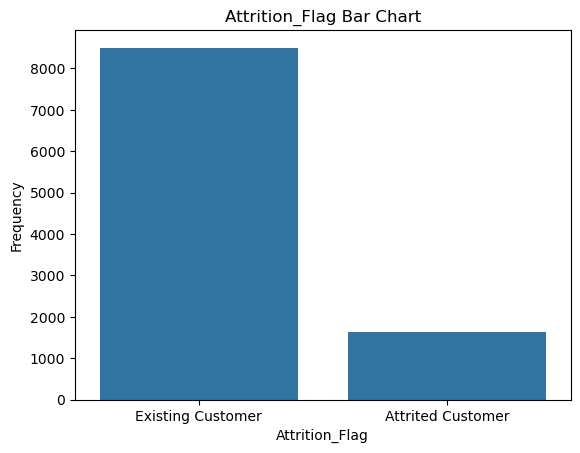

In [159]:
# Bar chart for Attrition_Flag
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Attrition_Flag Bar Chart')
plt.xlabel('Attrition_Flag')
plt.ylabel('Frequency')
plt.show()


classes are imblanced
so wont use accuracy as it is misleading with unblanced data (even after balancing)
will focus on precision and recall, f1 score, roc auc

SMOTE will be used to balance the dataset

One-Hot Encoding cateogrical variables ..... not ordered 
for ML and correlation analysis

In [160]:
# Binary encode Attrition Flag and Gender
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# One-hot encode categorical fields
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Remove Unknown columns if they exist (keeps the customers!)
unknown_cols = [col for col in df.columns if 'Unknown' in col]
df = df.drop(columns=unknown_cols, errors='ignore')


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Gender                          10127 non-null  int64  
 3   Dependent_count                 10127 non-null  int64  
 4   Months_on_book                  10127 non-null  int64  
 5   Total_Relationship_Count        10127 non-null  int64  
 6   Months_Inactive_12_mon          10127 non-null  int64  
 7   Contacts_Count_12_mon           10127 non-null  int64  
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  int64  
 10  Avg_Open_To_Buy                 10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

In [162]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Uneducated,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Marital_Status_Married,Marital_Status_Single,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,39,5,1,3,12691.0,777,...,False,False,True,False,False,True,False,False,False,False
1,0,49,0,5,44,6,1,2,8256.0,864,...,False,False,False,False,True,False,True,False,False,False
2,0,51,1,3,36,4,1,0,3418.0,0,...,False,False,False,True,False,True,False,False,False,False
3,0,40,0,4,34,3,4,1,3313.0,2517,...,False,False,False,False,True,False,False,False,False,False
4,0,40,1,3,21,5,1,0,4716.0,0,...,True,False,True,False,False,True,False,False,False,False


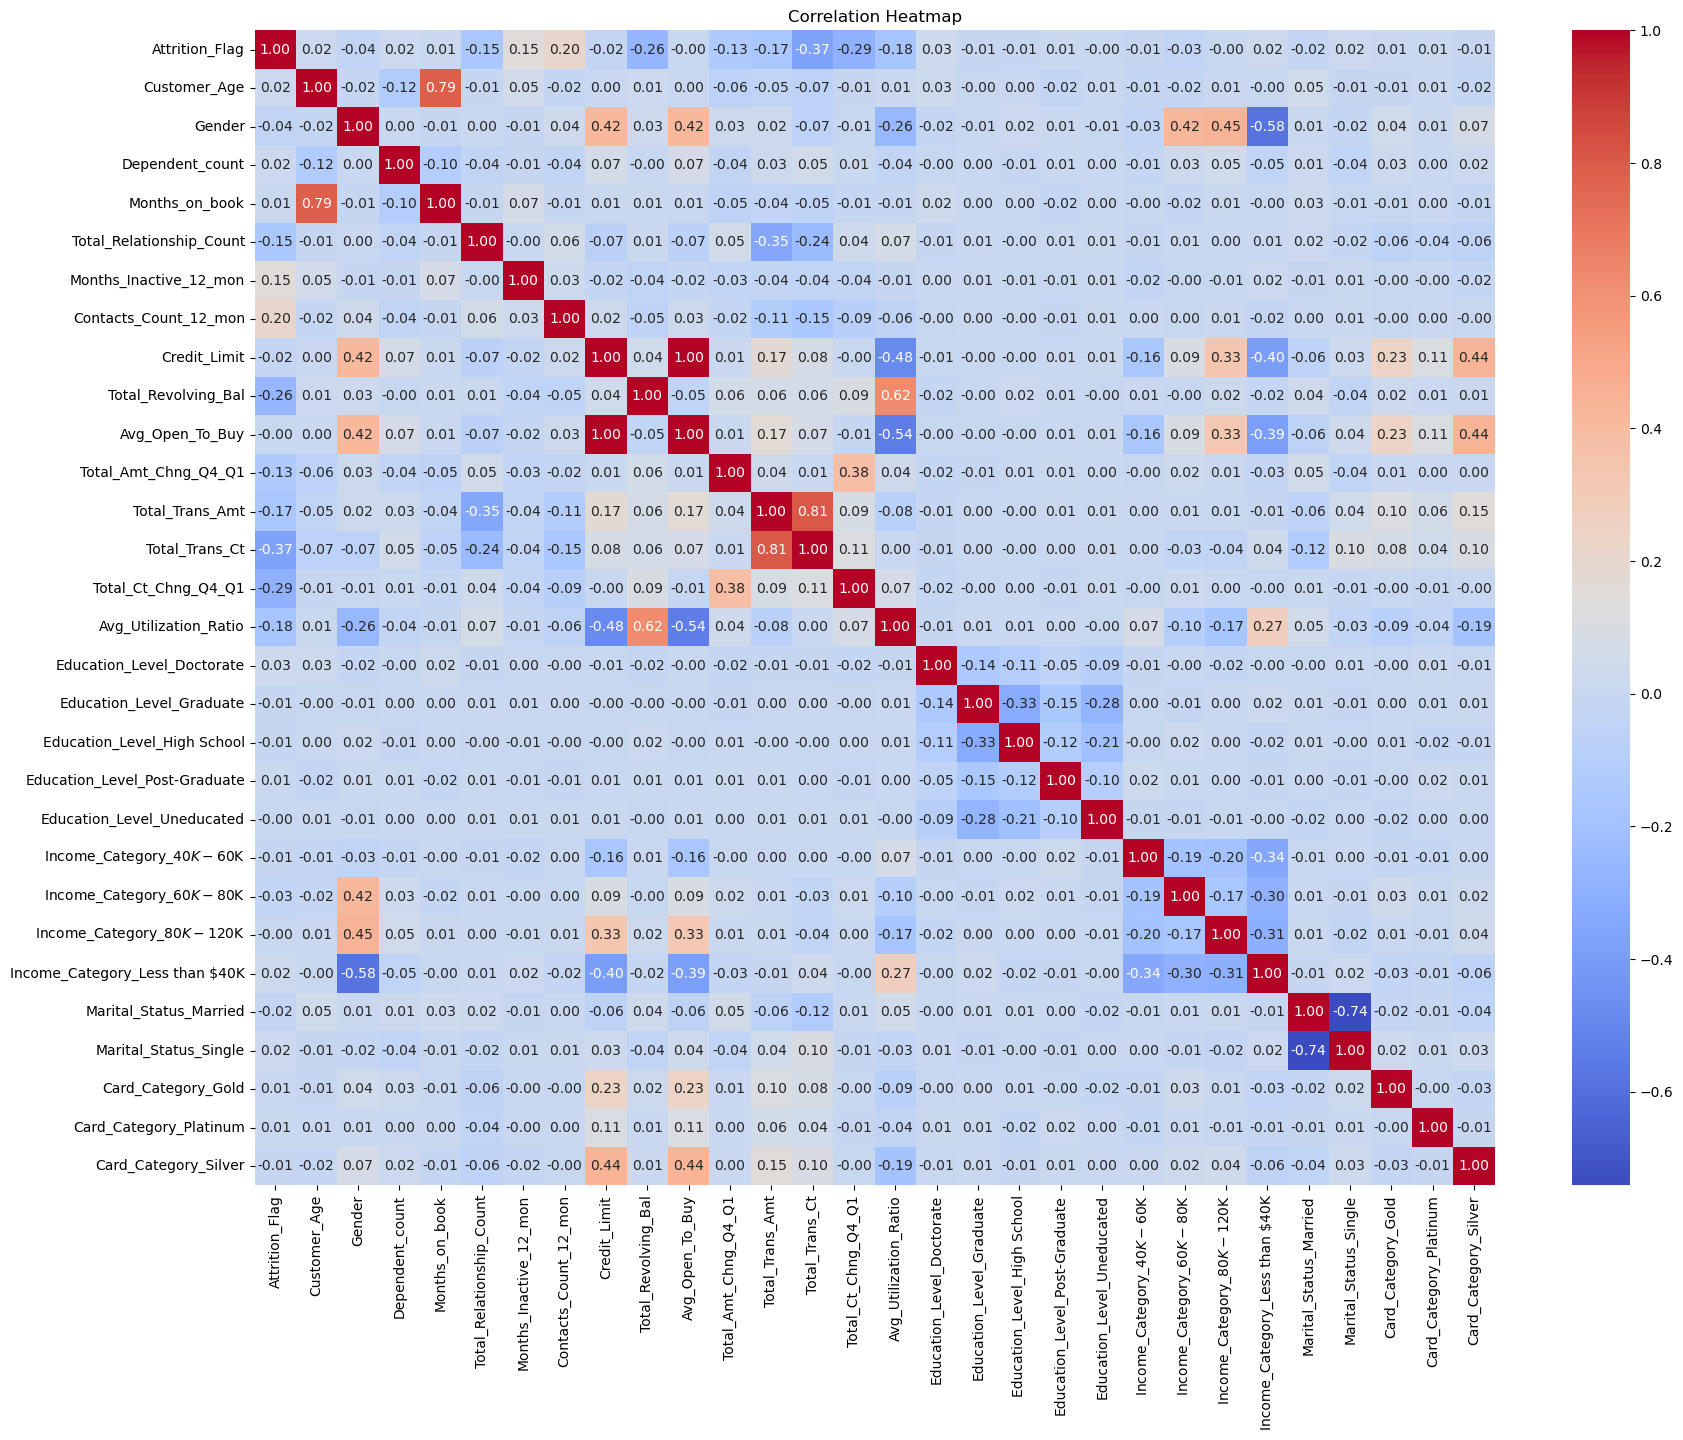

In [163]:
# Correlation Analysis
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


customer age and months on book .79
gender credit limit .42
gender and higher income 
credit limt and aveage open to buy 1.00
credit limit avg util ratio
credit limit an dincome raito
credit lmit and card category
avg utilization and total revolving correlated


features not very correlated
dont think need to make any feature changes for now althouth the one that is 1.00 correlated

latter on in updated notebook -> feature selection to see how performance is efect by removing collineariy and feature e that appear to be highly correlated

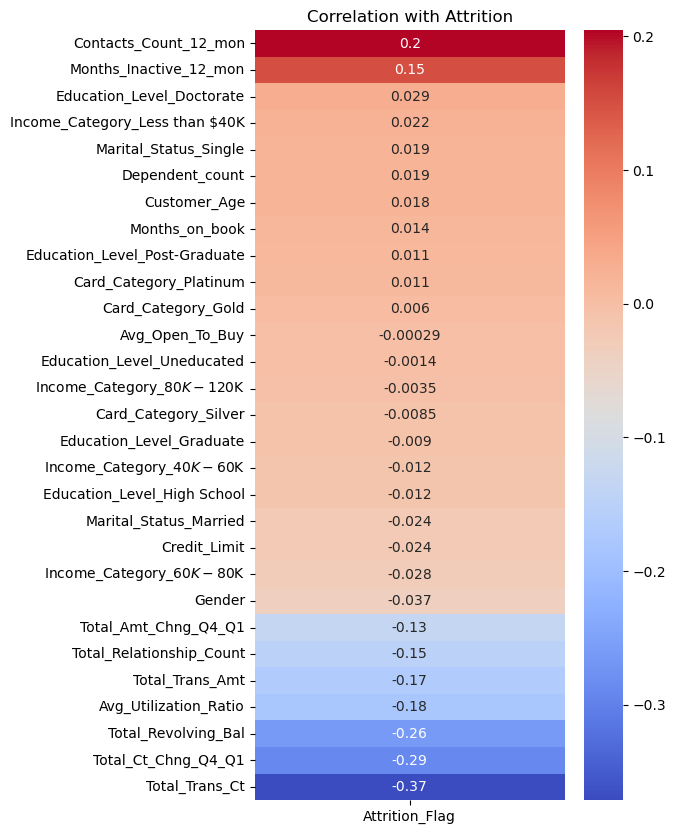

In [174]:
correlation = df.corr()
correlation_attrition = correlation['Attrition_Flag'].sort_values(ascending=False)
correlation_attrition = correlation_attrition.drop('Attrition_Flag')

plt.figure(figsize=(5, 10))
sns.heatmap(correlation_attrition.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation with Attrition')
plt.show()



## ML Section
possibly remove highley correlated fields? only higher than 90% though so not to bad
remove target variable?
    they onylr emoved during high correlation filtering porcess os perhaps dont need to

train test split
stratify to keep same propertion of attrition in train and test?
SMOTE on training data only?

models
scale needed for which models?

In [165]:
# train test split with stratificaiton

X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [166]:
# ML models
# why use logloss instead of other metrics fro logistic regression
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBClassifier": XGBClassifier(random_state=42, eval_metric="logloss"),
}

In [167]:
# possibly auc curve stuff

- Cross validation
- Smote: applies smote inside each fold
- stratifiedkfold maintains class distribution in each fold

In [168]:
# 2. Cross-validation with stratified folds
cv_results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    cv_scores = cross_val_score(
        pipeline, X_train, y_train, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='roc_auc'
    )

    cv_results[name] = cv_scores
    print(f"{name}: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")

RandomForestClassifier: 0.987 (+/- 0.004)
LogisticRegression: 0.884 (+/- 0.014)
XGBClassifier: 0.992 (+/- 0.003)


standard deviations good so low variance and appears to be stable model
not sur eif this also counts as checking fro overfitting

best model is xgboost so will use hyperparatemr tuning for paramters of this model only

In [169]:
# best model
best_model_name = max(cv_results, key=lambda x: cv_results[x].mean())
best_model = models[best_model_name]
best_model_name

'XGBClassifier'

### Hyperparamter Tuning
on best model only

In [170]:
param_grid = {
        "XGBClassifier": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
    }
}

grid_search = GridSearchCV(
    Pipeline([('smote', SMOTE()), ('model', best_model)]),
    param_grid[best_model_name],
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc'
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best CV score: {grid_search.best_score_:.3f}")


Best parameters: {'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
Best CV score: 0.993


In [171]:
# 3. FINAL evaluation on test set (ONLY ONCE)
best_tuned_model = grid_search.best_estimator_

# Get predictions
y_pred_proba = best_tuned_model.predict_proba(X_test)[:, 1]
y_pred = best_tuned_model.predict(X_test)

# Evaluate
test_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Final Test AUC: {test_auc:.3f}")

Final Test AUC: 0.991


### Threshold analysis 
business can decide which error is more costl then set thresholds accordingly

tfind optimal balance betweeen false positives and false negsatives

Simple rule: Lower threshold = more churn predictions = catch more real churners but also make more false alarms.
    Ex. .3 means predict if 30% confident
        .7 means predict churn only if 70% confident

In [172]:
from sklearn.metrics import classification_report, confusion_matrix

# Try different thresholds
for threshold in [0.3, 0.5, 0.7]:
    y_pred_custom = (y_pred_proba >= threshold).astype(int)
    print(f"\n Threshold {threshold}:")
    print(classification_report(y_test, y_pred_custom))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_custom))


 Threshold 0.3:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.88      0.91      0.90       325

    accuracy                           0.97      2026
   macro avg       0.93      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Confusion Matrix:
[[1662   39]
 [  30  295]]

 Threshold 0.5:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.91      0.89      0.90       325

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Confusion Matrix:
[[1673   28]
 [  37  288]]

 Threshold 0.7:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.86      0.90       325

    accuracy                           0.

threshold result. 
- al thresjolds appear to perfrom wel
- .5 seems the most balanced with highest f1 score

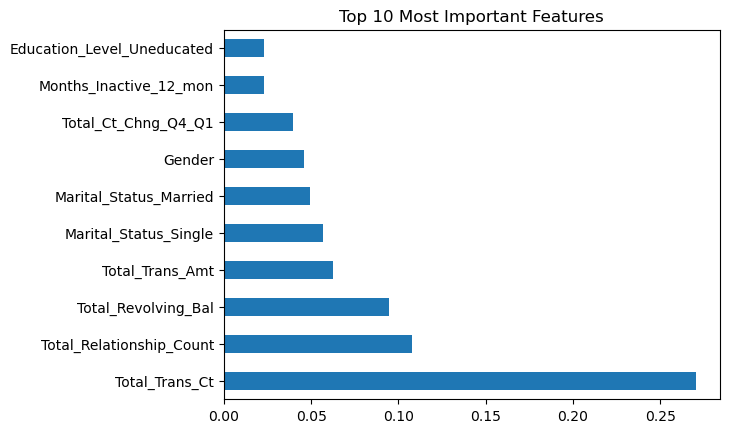

In [173]:
importances = best_tuned_model.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
top_10 = feat_imp.nlargest(10)
top_10.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.show()